In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('./survey_results_public.csv')
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


##### Q1: What are the most popular programming languages among developers

In [24]:
# find the corresponding column
data['LanguageHaveWorkedWith'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#', ...,
       'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript',
       'C;C++;Go;Lua;Objective-C;Python;Rust;SQL',
       'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript'], dtype=object)

In [42]:
lang = data['LanguageHaveWorkedWith'].value_counts().reset_index()
lang.rename(columns={'LanguageHaveWorkedWith': 'language'}, inplace=True)
lang.head()

,language,count
0,HTML/CSS;JavaScript;TypeScript,1002
1,Python,832
2,HTML/CSS;JavaScript;PHP;SQL,503
3,C#,452
4,HTML/CSS;JavaScript,452


In [130]:
# break the cell by each individual language
lang_all = ['HTML/CSS', 'JavaScript', 'TypeScript', 'Python', 'SQL', 'C#', 'PHP']
df = pd.DataFrame({x: [0] for x in lang_all})

for l in lang_all:
    for n in range(lang.shape[0]):
        if l in lang['language'][n]:
            df[l] += 1  
df

,HTML/CSS,JavaScript,TypeScript,Python,SQL,C#,PHP
0,13939,15988,10166,15012,13808,8125,5901


In [131]:
# Transpose the dataframe
df = df.T
df

,0
HTML/CSS,13939
JavaScript,15988
TypeScript,10166
Python,15012
SQL,13808
C#,8125
PHP,5901


In [132]:
df.columns = ['count']
df.reset_index(names=['language'], inplace=True)

In [140]:
df['pctg'] = df['count']/(df['count'].sum())
df.sort_values(by='pctg', ascending=False)

,language,count,pctg
1,JavaScript,15988,0.192768
3,Python,15012,0.181000
0,HTML/CSS,13939,0.168063
4,SQL,13808,0.166484
2,TypeScript,10166,0.122572
5,C#,8125,0.097964
6,PHP,5901,0.071149


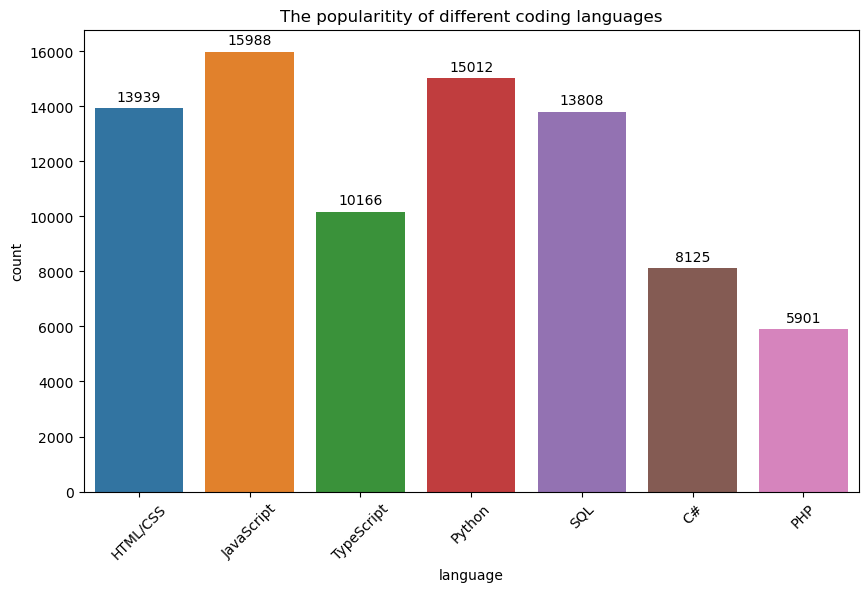

In [116]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='language', y='count')
plt.title('The popularitity of different coding languages')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i, padding=3)
plt.show()